### Evaluation Project - 9

# Insurance Claims- Fraud Detection
### Problem Statement:

### Business case:
Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.

In this project, you are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made. 

In this example, you will be working with some auto insurance data to demonstrate how you can create a predictive model that predicts if an insurance claim is fraudulent or not. 

 

### Note: Use the link below to reach to your dataset. 

Downlaod Files:

https://github.com/dsrscientist/Data-Science-ML-Capstone-Projects/blob/master/Automobile_insurance_fraud.csv

# Importing Liabraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### Getting Data and converting to DataFrame

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv')
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [3]:
df.shape

(1000, 40)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [5]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

#### There are no null values, however column '_c39' have 1000, which is similar to number of rows, so we can remove this from our dataset.

### Data Identification and correction

In [6]:
# Dropping _c39 from our data
df.drop('_c39',axis=1,inplace=True)

In [7]:
df.isnull().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

In [8]:
for i in df.columns:
    print(df[i].value_counts())
    print('======================================')

194    8
128    7
254    7
140    7
210    7
      ..
390    1
411    1
453    1
448    1
17     1
Name: months_as_customer, Length: 391, dtype: int64
43    49
39    48
41    45
34    44
38    42
30    42
31    42
37    41
33    39
40    38
32    38
29    35
46    33
42    32
35    32
36    32
44    32
28    30
26    26
45    26
48    25
47    24
27    24
57    16
25    14
55    14
49    14
53    13
50    13
24    10
54    10
61    10
51     9
60     9
58     8
56     8
23     7
21     6
59     5
62     4
52     4
64     2
63     2
19     1
20     1
22     1
Name: age, dtype: int64
521585    1
687755    1
674485    1
223404    1
991480    1
         ..
563878    1
620855    1
583169    1
337677    1
556080    1
Name: policy_number, Length: 1000, dtype: int64
01-01-2006    3
28-04-1992    3
05-08-1992    3
14-12-1991    2
09-08-2004    2
             ..
03-06-2014    1
12-12-1998    1
18-02-1999    1
30-10-1997    1
11-11-1996    1
Name: policy_bind_date, Length: 951, dtype: int64
OH   

### Observation
- **There is '?' in some rows, we will replace '?' with 'Some other**
- **We can see there is one row in negative value must be the mistake or not sure so dropping the row**
- **Incident Date is also merged, need to seperate into 3 separate columns, further we will remove Incident column as 3 new columns are created**
- **In incident data all the incident is from 2015 so droping the incident_year column as it will not cause much difference**
- **Also need to split policy_bind_date into three other columns**
- **There are three more columns policy_number,insured_zip and incident_location which can be removed and not required**-

**There is '?' in some rows, we will replace '?' with 'Some other**

In [9]:
df = df.replace('?','No Info')

- **We can see there is one row in negative value must be the mistake or not sure so dropping the row**

In [10]:
df['umbrella_limit'].value_counts()

 0           798
 6000000      57
 5000000      46
 4000000      39
 7000000      29
 3000000      12
 8000000       8
 9000000       5
 2000000       3
 10000000      2
-1000000       1
Name: umbrella_limit, dtype: int64

In [11]:
df.loc[df['umbrella_limit']== -1000000]

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
290,284,42,526039,04-05-1995,OH,100/300,500,1338.54,-1000000,438178,...,1,No Info,94160,8560,17120,68480,Chevrolet,Malibu,1996,N


In [12]:
df.drop(df[df['umbrella_limit']== -1000000].index,inplace=True)

- **Incident Date is also merged, need to seperate into 3 separate columns, further we will remove Incident column as 3 new columns are created**

In [13]:
# spliting ['incident_data'] into three other columns
df['incident_Date']=df['incident_date'].str.split('-').str[0]
df['incident_Month']=df['incident_date'].str.split('-').str[1]
df['incident_Year']=df['incident_date'].str.split('-').str[2]

- **In incident data all the incident is from 2015 so droping the incident_year column as it will not cause much difference**

In [14]:
# in incident data all the incident is from 2015 so droping the incident_year
df['incident_Year'].value_counts()
df.drop('incident_Year',axis=1,inplace=True)

**Also need to split policy_bind_date into three other columns**

In [15]:
# dividing policy_bind_date into three other columns
df['policy_bind_Date']=df['policy_bind_date'].str.split('-').str[0]
df['policy_bind_Month']=df['policy_bind_date'].str.split('-').str[1]
df['policy_bind_Year']=df['policy_bind_date'].str.split('-').str[2]

# droping policy_bind
df.drop('policy_bind_date',axis=1,inplace=True)

**There are three more columns policy_number,insured_zip and incident_location which can be removed and not required**

In [16]:
# removing policy_number, insured_zip, incident_location
df.drop(['policy_number','insured_zip','incident_location'],axis=1,inplace=True)

In [17]:
df.head()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,...,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,incident_Date,incident_Month,policy_bind_Date,policy_bind_Month,policy_bind_Year
0,328,48,OH,250/500,1000,1406.91,0,MALE,MD,craft-repair,...,52080,Saab,92x,2004,Y,25,01,17,10,2014
1,228,42,IN,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,...,3510,Mercedes,E400,2007,Y,21,01,27,06,2006
2,134,29,OH,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,...,23100,Dodge,RAM,2007,N,22,02,06,09,2000
3,256,41,IL,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,...,50720,Chevrolet,Tahoe,2014,Y,10,01,25,05,1990
4,228,44,IL,500/1000,1000,1583.91,6000000,MALE,Associate,sales,...,4550,Accura,RSX,2009,N,17,02,06,06,2014


In [18]:
# Checking shape of data after correction 
df.shape

(999, 40)

In [19]:
# Checking column names
df.columns

Index(['months_as_customer', 'age', 'policy_state', 'policy_csl',
       'policy_deductable', 'policy_annual_premium', 'umbrella_limit',
       'insured_sex', 'insured_education_level', 'insured_occupation',
       'insured_hobbies', 'insured_relationship', 'capital-gains',
       'capital-loss', 'incident_date', 'incident_type', 'collision_type',
       'incident_severity', 'authorities_contacted', 'incident_state',
       'incident_city', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', 'incident_Date',
       'incident_Month', 'policy_bind_Date', 'policy_bind_Month',
       'policy_bind_Year'],
      dtype='object')

# EDA - Exploratory Data Analysis

### Data Visualization 

N    752
Y    247
Name: fraud_reported, dtype: int64


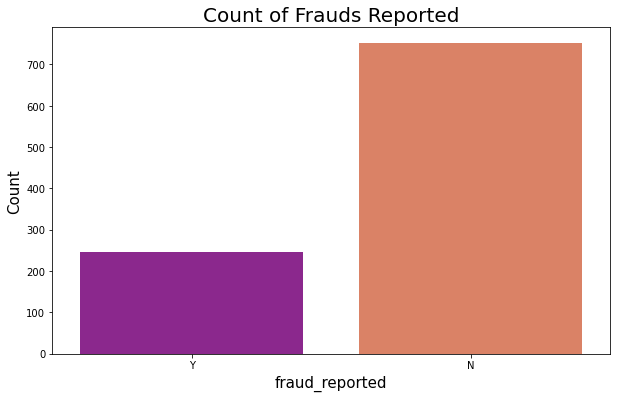

In [20]:
print (df['fraud_reported'].value_counts())
plt.figure(figsize = (10,6))
sns.countplot(x='fraud_reported', data=df, palette = 'plasma')
plt.title('Count of Frauds Reported', fontsize = 20)
plt.ylabel('Count',fontsize=15)
plt.xlabel('fraud_reported',fontsize=15)
plt.show()

Observation - Out of 999 entries, in 247 entries fraud was not reported and remaining 752 was not reported.

FEMALE    537
MALE      462
Name: insured_sex, dtype: int64


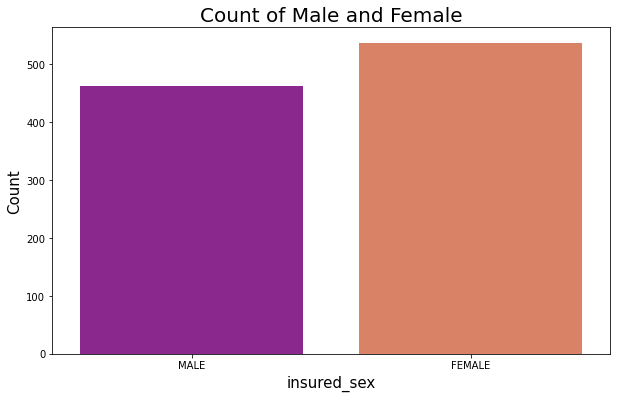

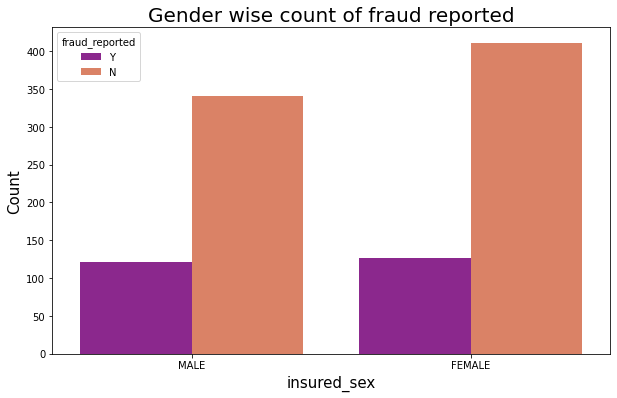

In [21]:
print (df['insured_sex'].value_counts())
plt.figure(figsize = (10,6))
sns.countplot(x='insured_sex', data=df, palette = 'plasma')
plt.title('Count of Male and Female', fontsize = 20)
plt.ylabel('Count',fontsize=15)
plt.xlabel('insured_sex',fontsize=15)
plt.show()

print("==================================================================================================================")

plt.figure(figsize = (10,6))
sns.countplot(hue = 'fraud_reported',x='insured_sex',data=df, palette = 'plasma')
plt.title('Gender wise count of fraud reported', fontsize = 20)
plt.ylabel('Count',fontsize=15)
plt.xlabel('insured_sex',fontsize=15)
plt.show()

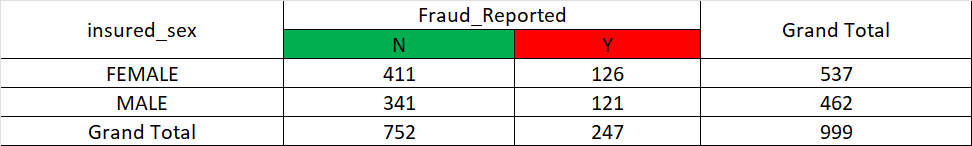

Observation - Out of 999 people 537 are Female and remaining 462 are males.

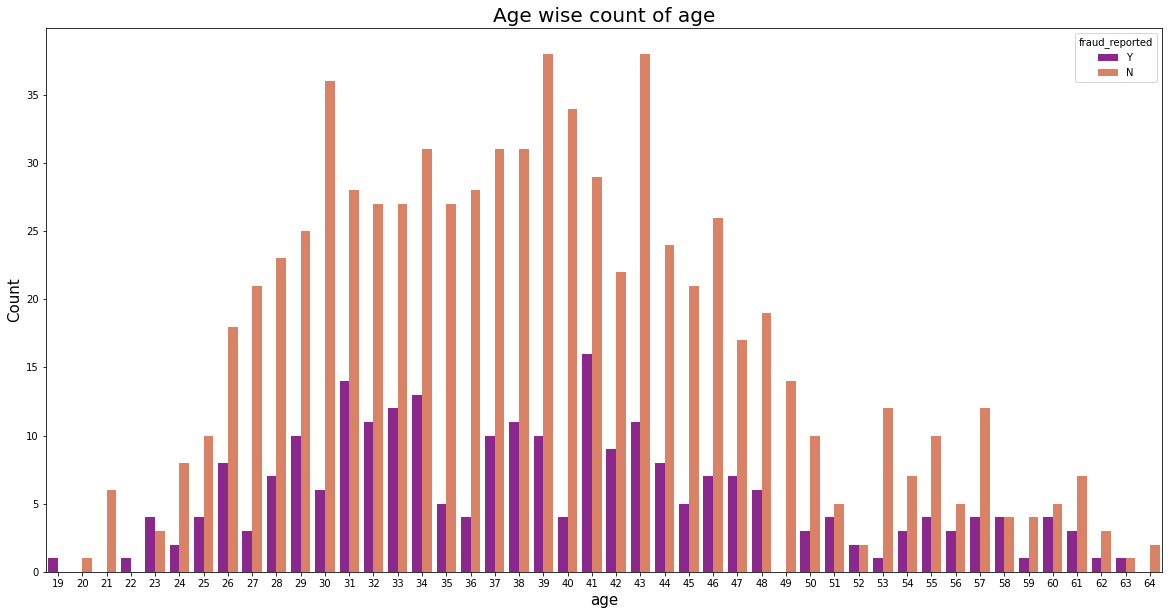

In [22]:
plt.figure(figsize = (20,10))
sns.countplot(hue = 'fraud_reported',x='age',data=df, palette = 'plasma')
plt.title('Age wise count of age', fontsize = 20)
plt.ylabel('Count',fontsize=15)
plt.xlabel('age',fontsize=15)
plt.show()

Observation - Most frauds are of people with 41 years of age followed by 31 years, age 20 and 64 are where no frauds were reported.

JD             161
High School    160
MD             144
Associate      144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64


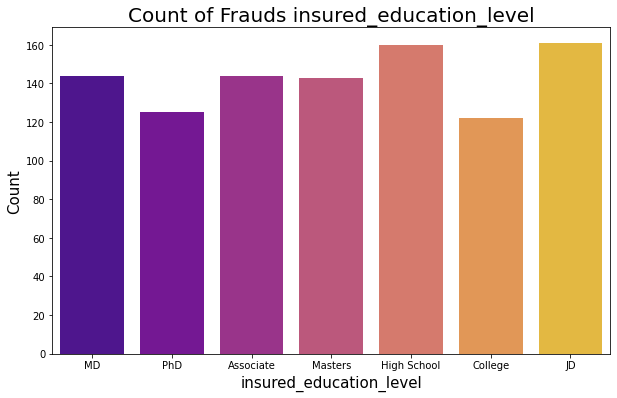

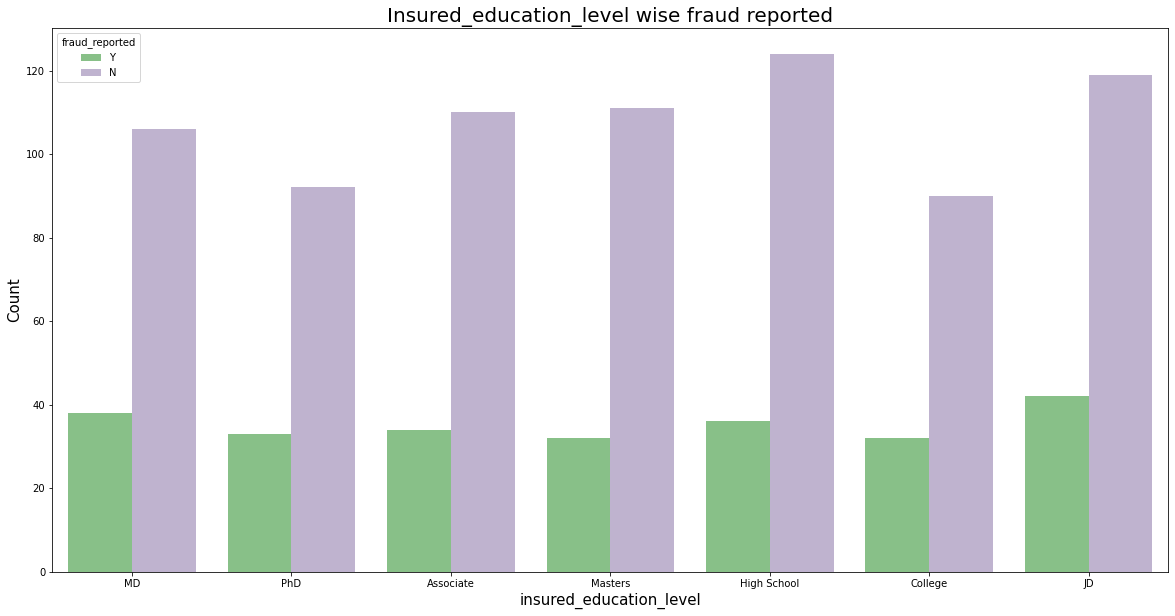

In [23]:
print (df['insured_education_level'].value_counts())
plt.figure(figsize = (10,6))
sns.countplot(x='insured_education_level', data=df, palette = 'plasma')
plt.title('Count of Frauds insured_education_level', fontsize = 20)
plt.ylabel('Count',fontsize=15)
plt.xlabel('insured_education_level',fontsize=15)
plt.show()

print("==================================================================================================================")

plt.figure(figsize = (20,10))
sns.countplot(hue = 'fraud_reported',x='insured_education_level',data=df, palette = 'Accent')
plt.title('Insured_education_level wise fraud reported', fontsize = 20)
plt.ylabel('Count',fontsize=15)
plt.xlabel('insured_education_level',fontsize=15)
plt.show()

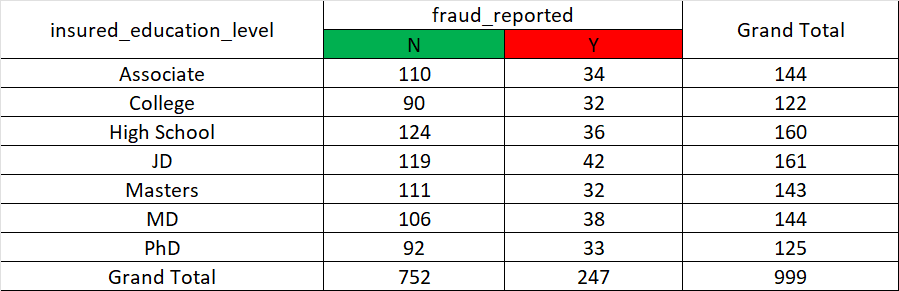

Observation
1. Out of 999 people, there are 144 associate, 122 college students, 160 Highschool students, 161 jd, 143 mastersm and 125 phd holders.
2. Most frauds are reported in JD while college have less frauds reported.

Springfield    157
Arlington      151
Columbus       149
Northbend      145
Hillsdale      141
Riverwood      134
Northbrook     122
Name: incident_city, dtype: int64


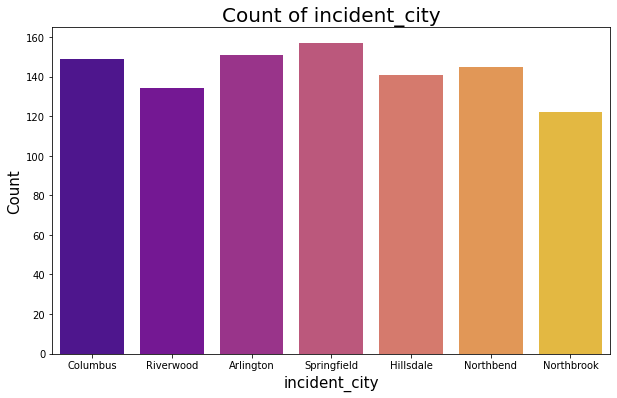

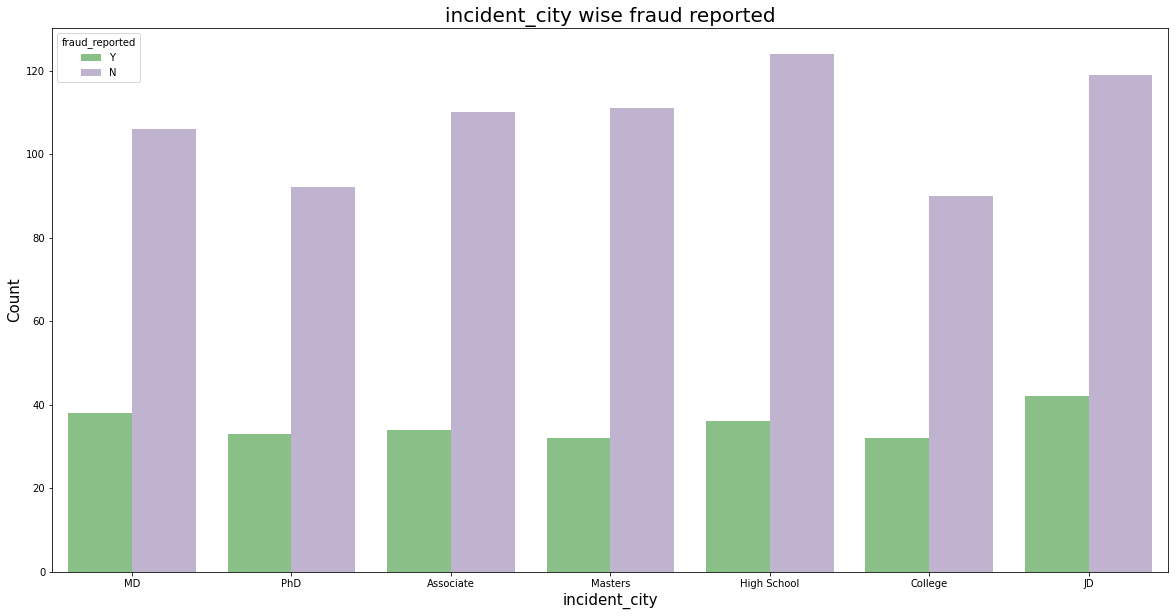

In [24]:
print (df['incident_city'].value_counts())
plt.figure(figsize = (10,6))
sns.countplot(x='incident_city', data=df, palette = 'plasma')
plt.title('Count of incident_city', fontsize = 20)
plt.ylabel('Count',fontsize=15)
plt.xlabel('incident_city',fontsize=15)
plt.show()

print("==================================================================================================================")

plt.figure(figsize = (20,10))
sns.countplot(hue = 'fraud_reported',x='insured_education_level',data=df, palette = 'Accent')
plt.title('incident_city wise fraud reported', fontsize = 20)
plt.ylabel('Count',fontsize=15)
plt.xlabel('incident_city',fontsize=15)
plt.show()

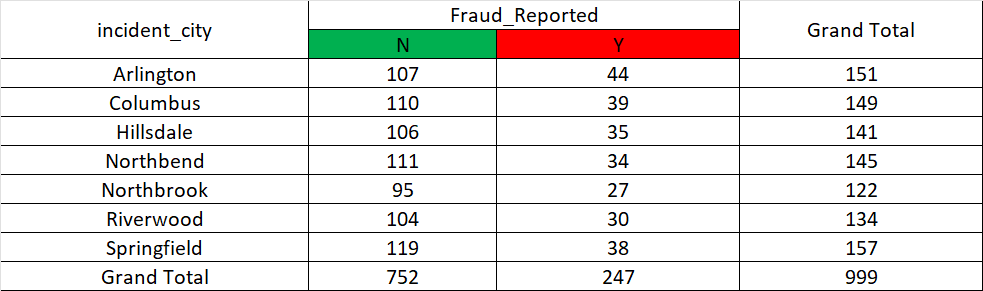

Springfield have most number of policies, from which in 38 cases fraud was reports and remaing 119 cases fraud was not reported.

machine-op-inspct    92
prof-specialty       85
tech-support         78
sales                76
exec-managerial      76
craft-repair         74
transport-moving     72
other-service        71
priv-house-serv      71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: insured_occupation, dtype: int64


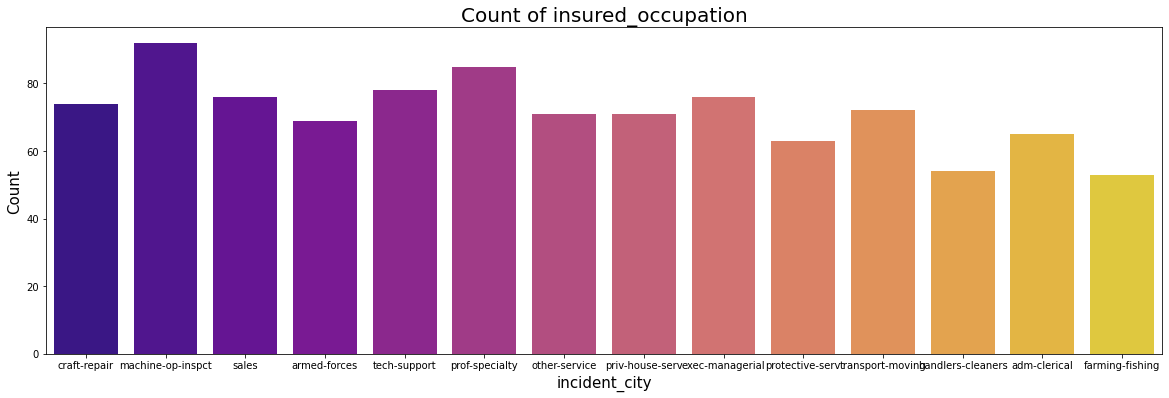

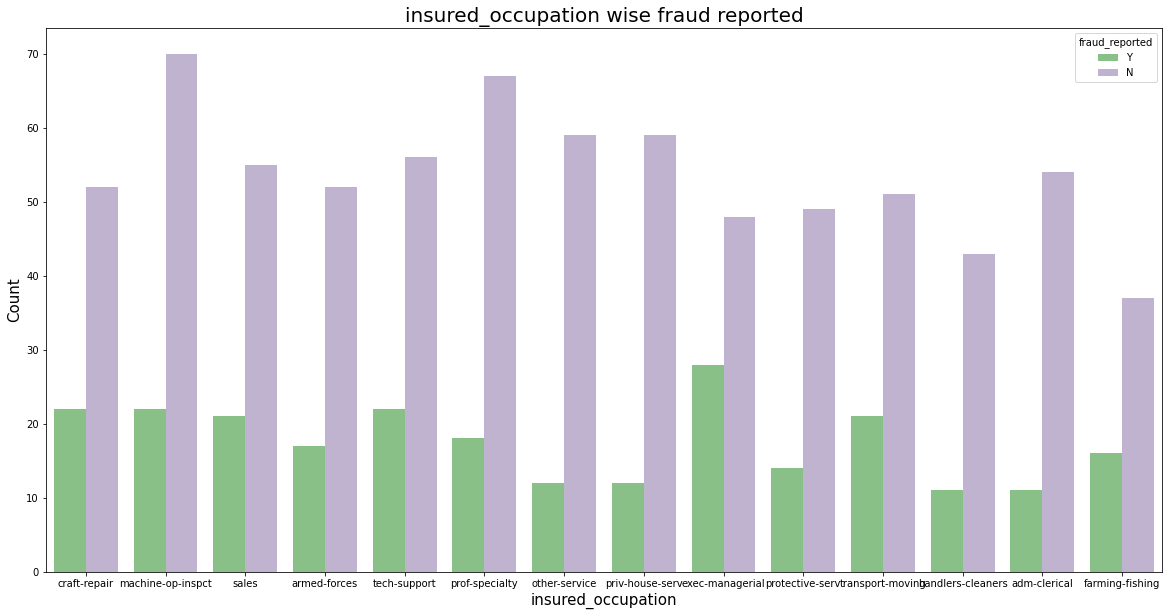

In [25]:
print (df['insured_occupation'].value_counts())
plt.figure(figsize = (20,6))
sns.countplot(x='insured_occupation', data=df, palette = 'plasma')
plt.title('Count of insured_occupation', fontsize = 20)
plt.ylabel('Count',fontsize=15)
plt.xlabel('incident_city',fontsize=15)
plt.show()

print("==================================================================================================================")

plt.figure(figsize = (20,10))
sns.countplot(hue = 'fraud_reported',x='insured_occupation',data=df, palette = 'Accent')
plt.title('insured_occupation wise fraud reported', fontsize = 20)
plt.ylabel('Count',fontsize=15)
plt.xlabel('insured_occupation',fontsize=15)
plt.show()

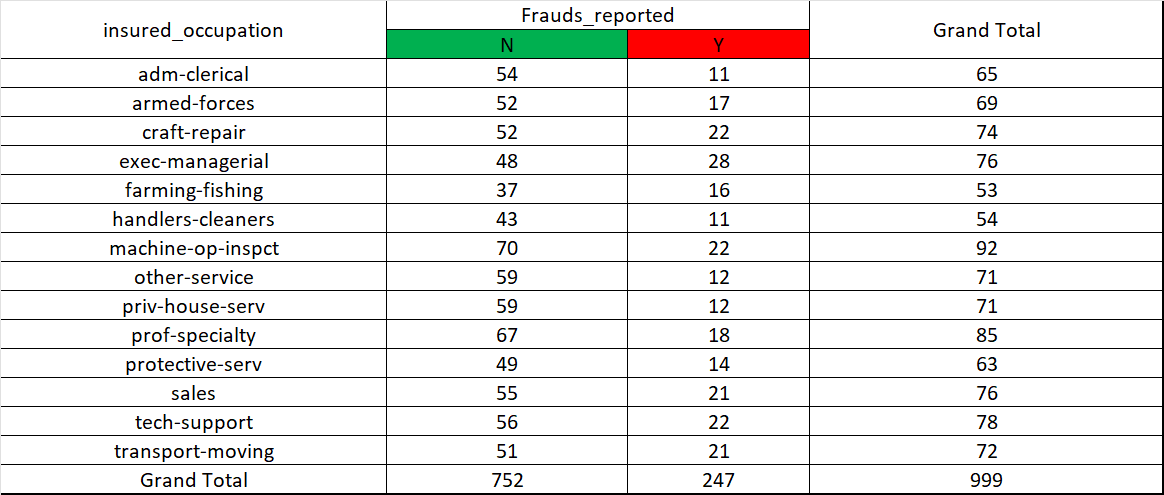


Multi-vehicle Collision     419
Single Vehicle Collision    402
Vehicle Theft                94
Parked Car                   84
Name: incident_type, dtype: int64


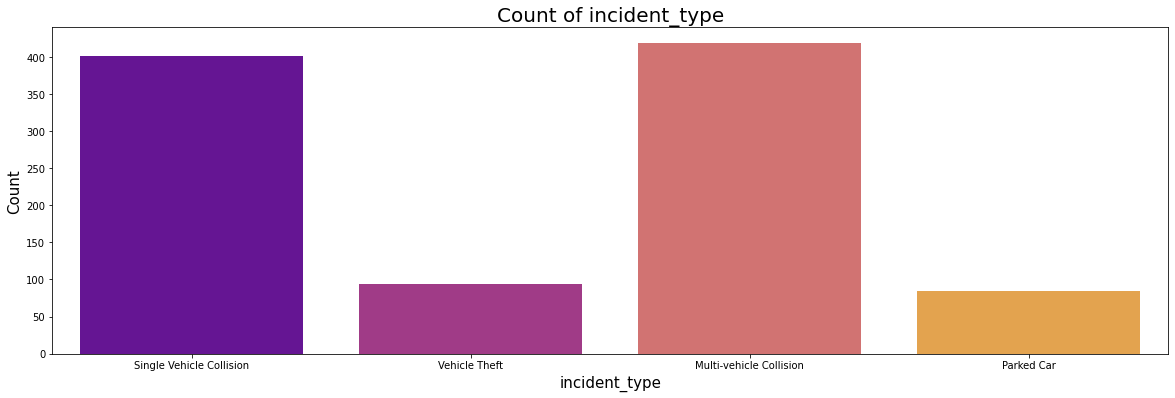

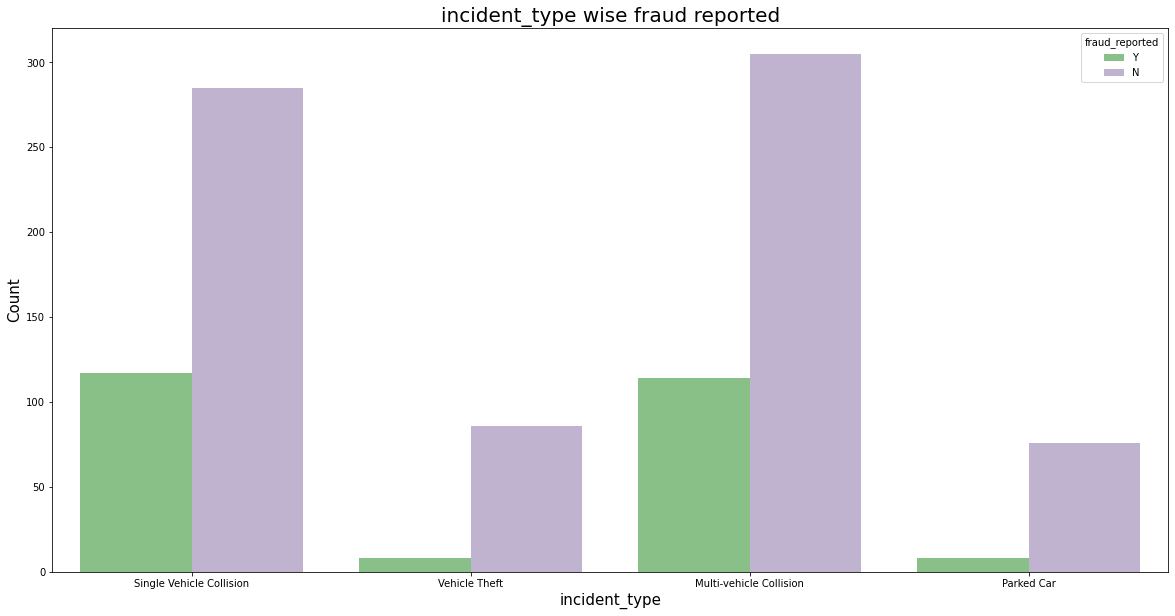

In [26]:
print (df['incident_type'].value_counts())
plt.figure(figsize = (20,6))
sns.countplot(x='incident_type', data=df, palette = 'plasma')
plt.title('Count of incident_type', fontsize = 20)
plt.ylabel('Count',fontsize=15)
plt.xlabel('incident_type',fontsize=15)
plt.show()

print("==================================================================================================================")

plt.figure(figsize = (20,10))
sns.countplot(hue = 'fraud_reported',x='incident_type',data=df, palette = 'Accent')
plt.title('incident_type wise fraud reported', fontsize = 20)
plt.ylabel('Count',fontsize=15)
plt.xlabel('incident_type',fontsize=15)
plt.show()

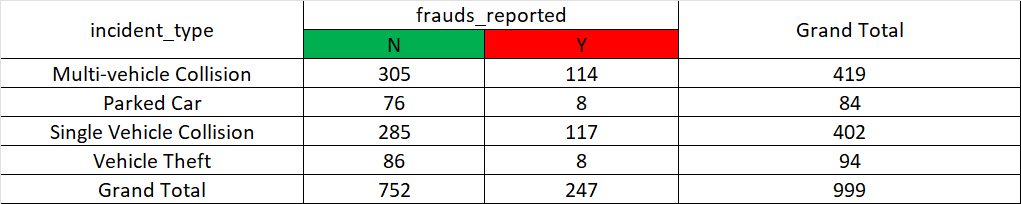

## Skewness

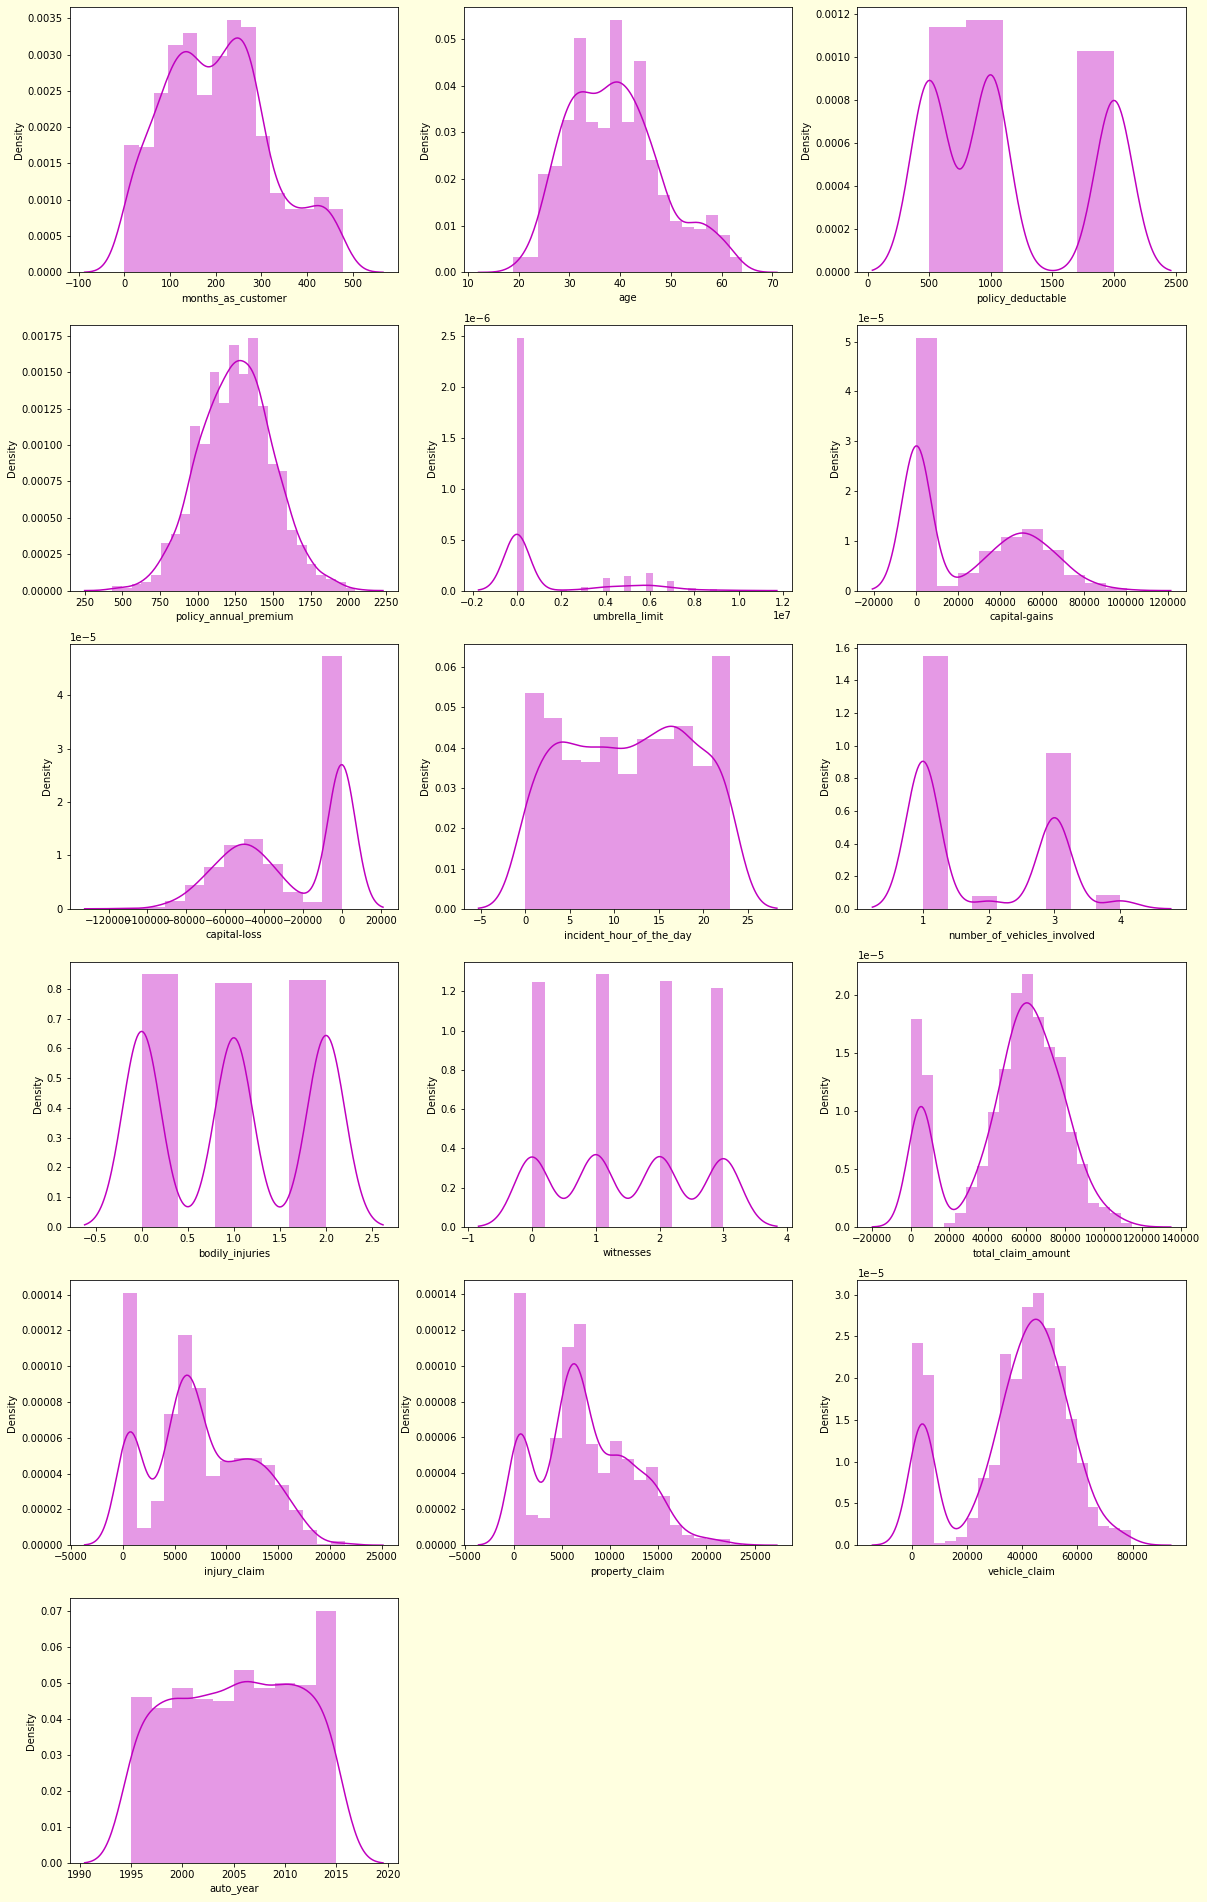

In [27]:
# ploting for numerical columns only
plt.figure(figsize = (20,40), facecolor = 'lightyellow')
for i in enumerate(df.select_dtypes(include=['int64','float','int32'])):
    plt.subplot(7,3,i[0]+1)
    sns.distplot(df[i[1]],color='m')

In [28]:
df.select_dtypes(include=['int64','float','int32']).skew()

months_as_customer             0.364014
age                            0.479796
policy_deductable              0.476426
policy_annual_premium          0.005374
umbrella_limit                 1.806100
capital-gains                  0.477220
capital-loss                  -0.389813
incident_hour_of_the_day      -0.034990
number_of_vehicles_involved    0.501009
bodily_injuries                0.012940
witnesses                      0.018399
total_claim_amount            -0.595646
injury_claim                   0.265382
property_claim                 0.378121
vehicle_claim                 -0.622627
auto_year                     -0.049502
dtype: float64

In [29]:
from sklearn.preprocessing import power_transform

df[['umbrella_limit','total_claim_amount','vehicle_calim']]=power_transform(
     df[['umbrella_limit','total_claim_amount','vehicle_claim']],method='yeo-johnson')

## Handling Outliers

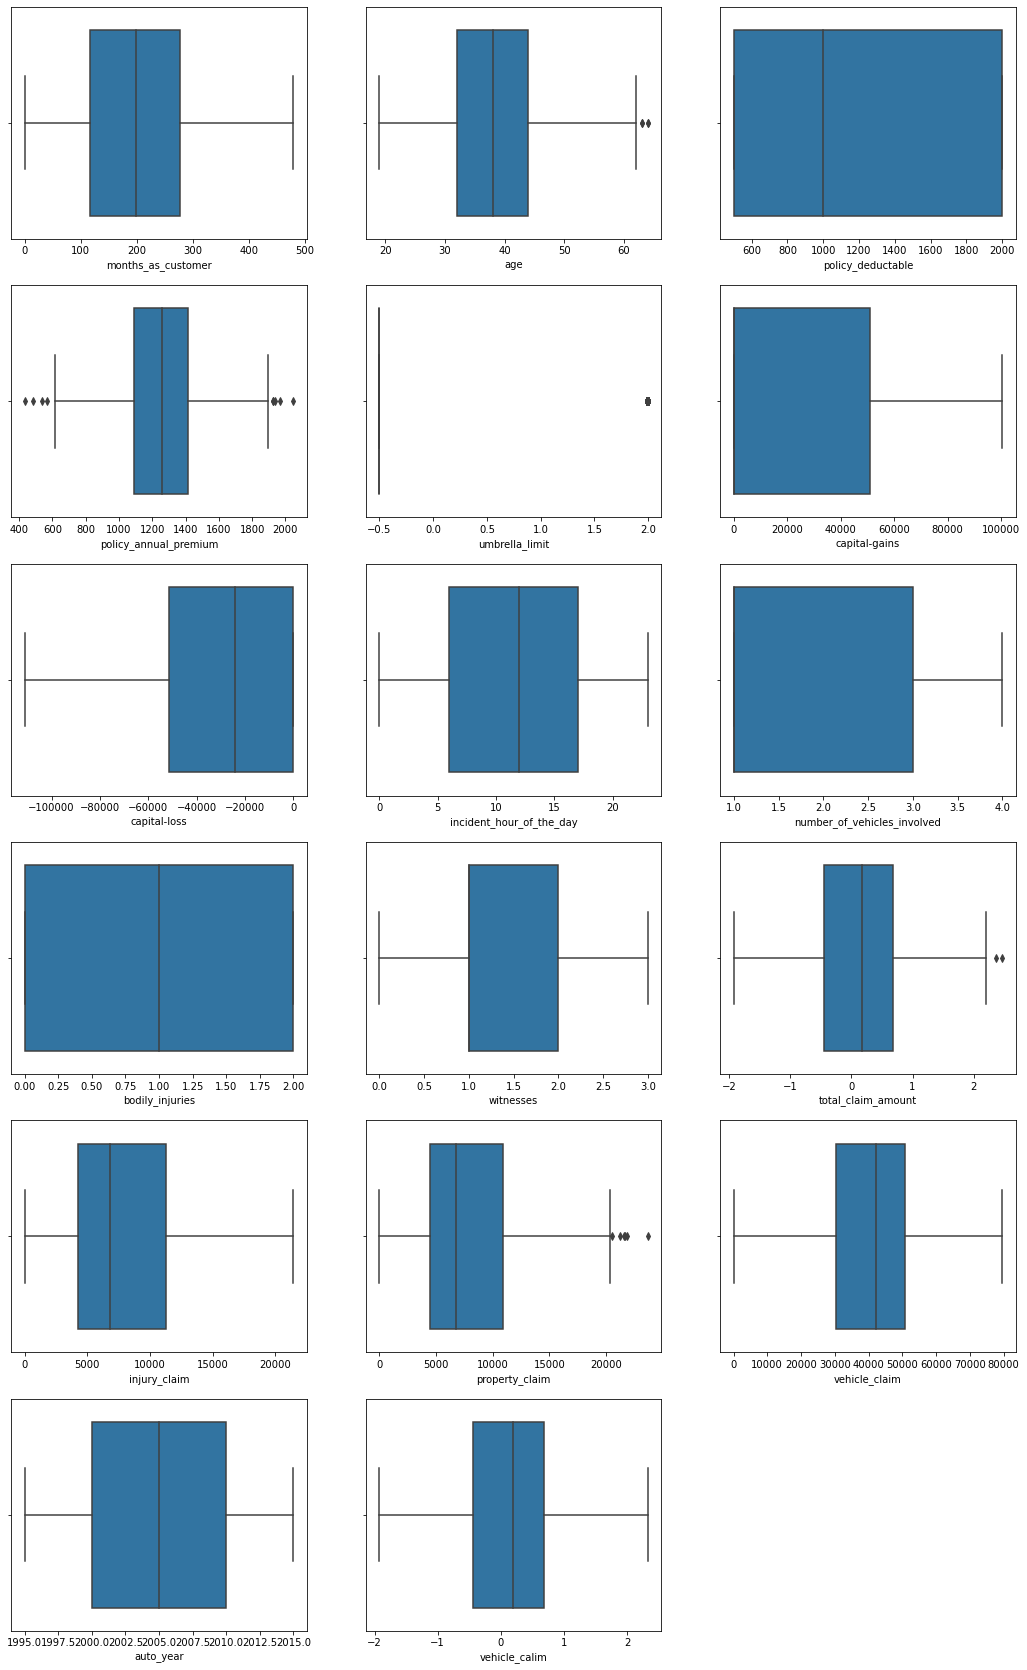

In [30]:
plt.figure(figsize=(18,35))
for i in enumerate(df.select_dtypes(include=['int64','float','int32'])):
    plt.subplot(7,3,i[0]+1)
    sns.boxplot(df[i[1]])

## Removing Outliers
### ZSCORE Method

In [31]:
# Importing Zscore from scipy stats
from scipy.stats import zscore

z=np.abs(zscore(df.select_dtypes(include=['int64','float','int32'])))

print(np.where(z>3))

(array([229, 248, 499, 762, 806], dtype=int64), array([ 3,  3, 13,  3,  6], dtype=int64))


In [32]:
# Removing outliers
df_1=df[(z<3).all(axis=1)]
print(("with outliers::",df.shape))
print("After removing outliers::",df_1.shape)

('with outliers::', (999, 41))
After removing outliers:: (994, 41)


In [33]:
# Checking dataloss after removing outliers
dataloss = (999-994)*100/999
print ('DATA LOSS = ', dataloss, '%')

DATA LOSS =  0.5005005005005005 %


In [34]:
df= df_1

# Label Encoder

In [35]:
from sklearn.preprocessing import LabelEncoder

In [36]:
le=LabelEncoder()
categ_data = df.select_dtypes(exclude=['int64','float','int32'])
for val in categ_data:
    df[val]=le.fit_transform(df[val].astype(str))

## Correlation

In [37]:
df.corr()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,...,auto_make,auto_model,auto_year,fraud_reported,incident_Date,incident_Month,policy_bind_Date,policy_bind_Month,policy_bind_Year,vehicle_calim
months_as_customer,1.000000,0.922134,-0.000710,-0.022155,0.024506,-0.003554,0.001839,0.058179,0.000213,0.005617,...,0.049692,0.002336,0.002075,0.021285,-0.006121,-0.046365,0.059309,-0.004099,-0.045296,0.061433
age,0.922134,1.000000,-0.015589,-0.012040,0.027313,0.005820,-0.002620,0.072521,0.001994,0.014180,...,0.032294,0.015959,0.003600,0.012542,0.000145,-0.040246,0.059229,0.005846,-0.035144,0.061774
policy_state,-0.000710,-0.015589,1.000000,0.001060,0.012032,0.014092,-0.017620,-0.020627,-0.030795,-0.030836,...,0.016907,-0.025189,0.004112,0.029568,0.023085,0.018571,0.012682,0.044631,-0.004635,-0.002476
policy_csl,-0.022155,-0.012040,0.001060,1.000000,0.004836,0.031266,0.015926,-0.007048,0.008591,0.019369,...,-0.007537,0.049129,-0.036701,-0.039479,-0.004787,-0.028897,0.005989,-0.021210,-0.018807,-0.045017
policy_deductable,0.024506,0.027313,0.012032,0.004836,1.000000,-0.008635,-0.002423,-0.009254,0.012991,-0.051469,...,-0.033335,-0.001121,0.028408,0.016075,-0.020162,-0.031331,-0.001435,-0.027078,-0.050750,0.006841
policy_annual_premium,-0.003554,0.005820,0.014092,0.031266,-0.008635,1.000000,-0.002937,0.041862,-0.020993,0.030722,...,0.012428,-0.034696,-0.039402,-0.009769,0.027244,-0.051884,-0.040934,-0.002935,0.001628,0.012185
umbrella_limit,0.001839,-0.002620,-0.017620,0.015926,-0.002423,-0.002937,1.000000,0.013961,-0.017408,0.017670,...,0.007787,0.027209,0.005341,0.059517,-0.030844,-0.005229,-0.020785,-0.045851,0.060678,-0.033608
insured_sex,0.058179,0.072521,-0.020627,-0.007048,-0.009254,0.041862,0.013961,1.000000,0.009152,-0.008314,...,0.025766,-0.019554,-0.028675,0.032300,-0.000781,-0.025324,0.046614,-0.001091,-0.030257,-0.028167
insured_education_level,0.000213,0.001994,-0.030795,0.008591,0.012991,-0.020993,-0.017408,0.009152,1.000000,-0.021803,...,0.056347,0.051796,0.042969,0.010670,-0.033172,-0.054292,0.041825,-0.081509,0.016452,0.072768
insured_occupation,0.005617,0.014180,-0.030836,0.019369,-0.051469,0.030722,0.017670,-0.008314,-0.021803,1.000000,...,0.045400,0.022141,-0.003689,0.003720,-0.018217,-0.013948,0.010183,-0.013187,-0.026187,0.000740


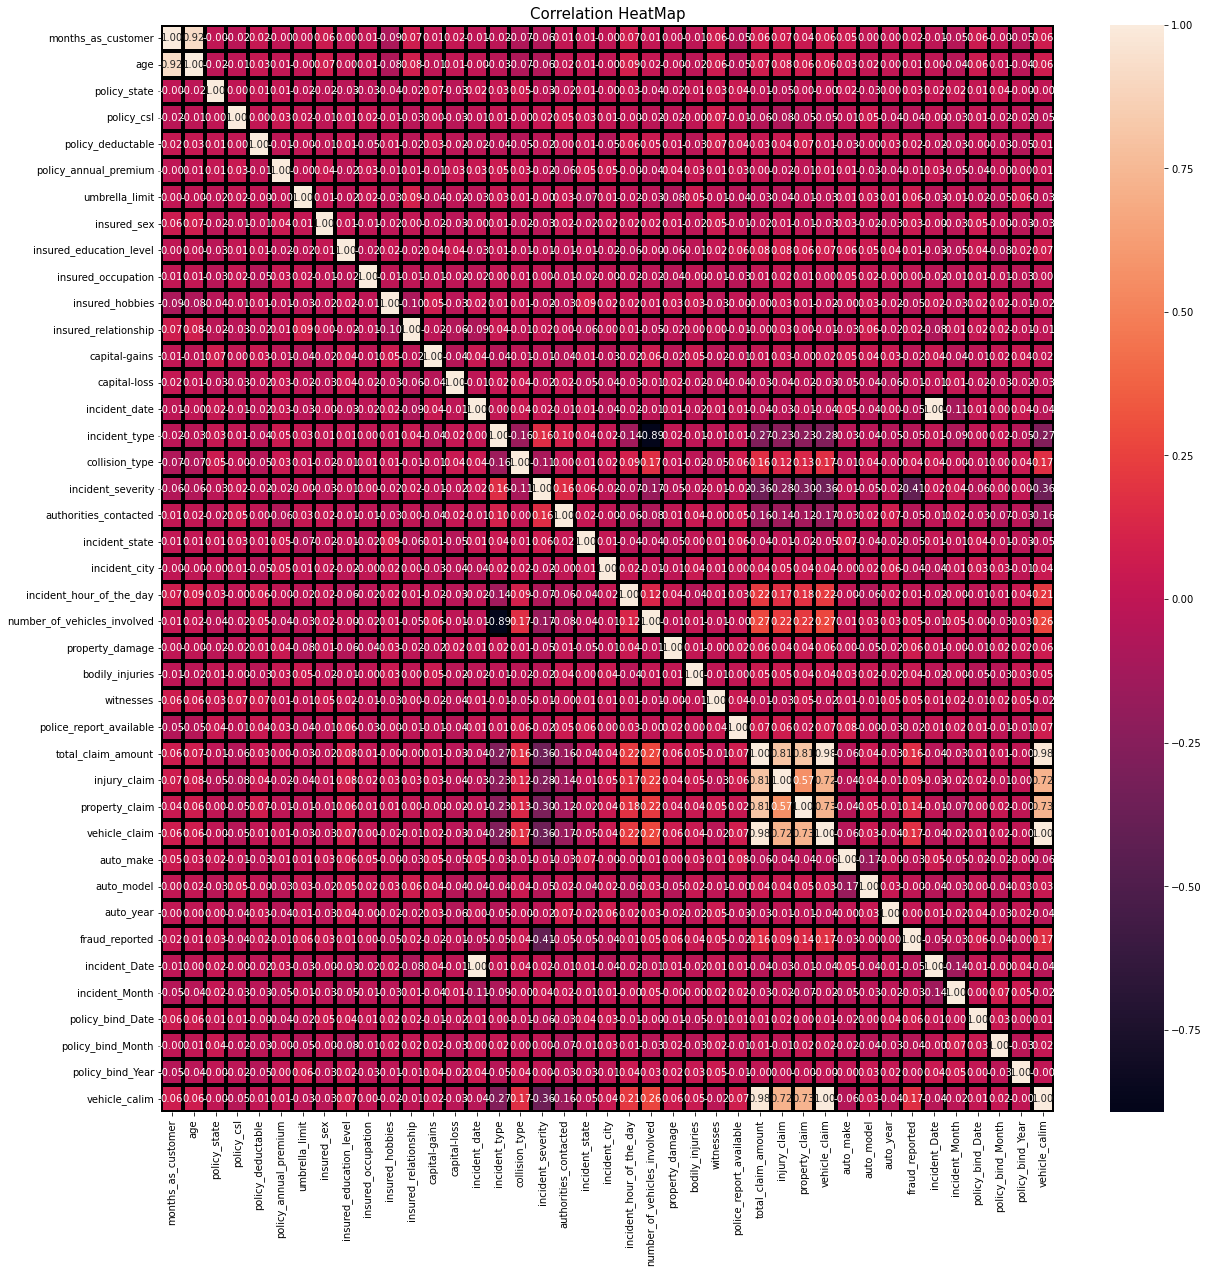

In [38]:
plt.figure (figsize = (20,20))
plt.title('Correlation HeatMap', fontsize = 15)
sns.heatmap(df.corr(), annot = True , linewidths = 4, linecolor='black',fmt='.2f')
plt.show()

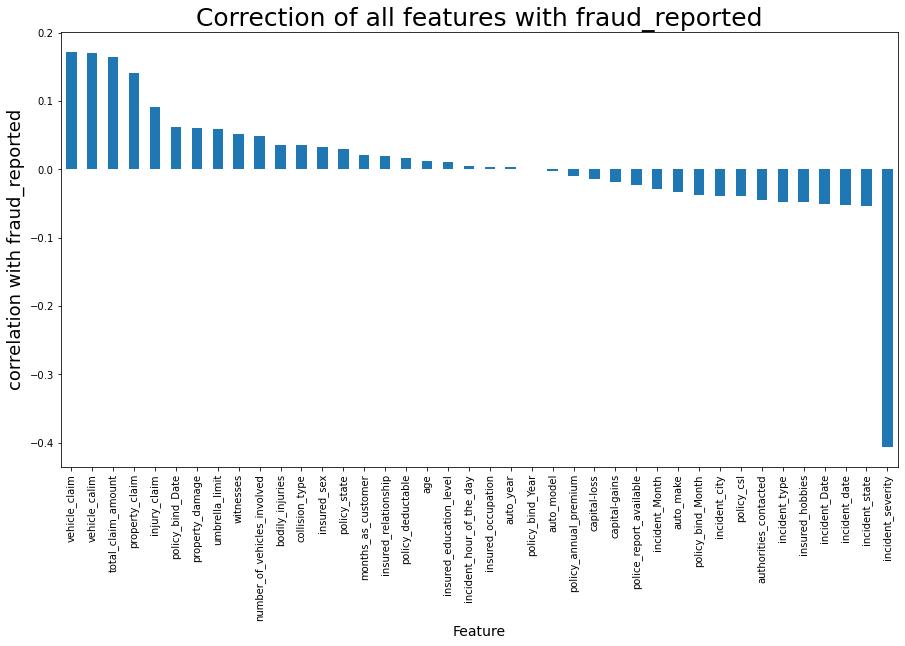

In [39]:
# Checking correlation of all features with fraud_reported

plt.figure(figsize = (15,8))
df.corr()['fraud_reported'].sort_values(ascending=False).drop(['fraud_reported']).plot.bar()
plt.xlabel("Feature", fontsize = 14)
plt.ylabel("correlation with fraud_reported", fontsize = 18)
plt.title ("Correction of all features with fraud_reported", fontsize = 25)
plt.show()

## Dividing feature and target to X and Y

In [40]:
x = df.drop(['fraud_reported'],axis=1)
y = df['fraud_reported']
x

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,...,vehicle_claim,auto_make,auto_model,auto_year,incident_Date,incident_Month,policy_bind_Date,policy_bind_Month,policy_bind_Year,vehicle_calim
0,328,48,2,1,1000,1406.91,-0.501876,1,4,2,...,52080,10,1,2004,24,0,16,9,24,0.756106
1,228,42,1,1,2000,1197.22,1.992256,1,4,6,...,3510,8,12,2007,20,0,26,5,16,-1.786299
2,134,29,2,0,2000,1413.14,1.992256,0,6,11,...,23100,4,30,2007,21,1,5,8,10,-0.820213
3,256,41,0,1,2000,1415.74,1.993445,0,6,1,...,50720,3,34,2014,9,0,24,4,0,0.679910
4,228,44,0,2,1000,1583.91,1.993445,1,0,11,...,4550,0,31,2009,16,1,5,5,24,-1.739726
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,2,2,1000,1310.80,-0.501876,0,5,2,...,61040,6,6,2006,21,1,15,6,1,1.262302
996,285,41,0,0,1000,1436.79,-0.501876,0,6,9,...,72320,13,28,2015,23,0,4,0,24,1.908849
997,130,34,2,1,500,1383.49,1.988548,0,5,1,...,52500,11,19,1996,22,0,16,1,13,0.779673
998,458,62,0,2,2000,1356.92,1.992256,1,0,5,...,36540,1,5,1998,25,1,17,10,21,-0.102905


In [41]:
# Importing StandardScaler
from sklearn.preprocessing import StandardScaler

In [42]:
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,...,vehicle_claim,auto_make,auto_model,auto_year,incident_Date,incident_Month,policy_bind_Date,policy_bind_Month,policy_bind_Year,vehicle_calim
0,1.074398,0.986482,1.186952,0.062518,-0.224473,0.621540,-0.503456,1.075259,0.529660,-1.160879,...,0.753092,0.855268,-1.645807,-0.185841,1.154829,-0.951113,0.179368,0.979192,1.685779,0.757341
1,0.205226,0.330368,-0.016956,0.062518,1.410153,-0.250440,1.986005,1.075259,0.529660,-0.165482,...,-1.822734,0.358838,-0.658359,0.313868,0.692060,-0.951113,1.316432,-0.163534,0.599537,-1.785728
2,-0.611795,-1.091214,1.186952,-1.180347,1.410153,0.647447,1.986005,-0.930008,1.555942,1.078764,...,-0.783812,-0.634022,0.957465,0.313868,0.807752,0.958798,-1.071403,0.693511,-0.215145,-0.819391
3,0.448594,0.221015,-1.220865,0.062518,1.410153,0.658259,1.987191,-0.930008,1.555942,-1.409728,...,0.680967,-0.882237,1.316537,1.479856,-0.580557,-0.951113,1.089019,-0.449216,-1.572948,0.681125
4,0.205226,0.549073,-1.220865,1.305384,-0.224473,1.357581,1.987191,1.075259,-1.522902,1.078764,...,-1.767580,-1.626882,1.047233,0.647007,0.229290,0.958798,-1.071403,-0.163534,1.685779,-1.739144
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
989,-1.750410,-0.107042,1.186952,1.305384,-0.224473,0.221874,-0.503456,-0.930008,1.042801,-1.160879,...,1.228271,-0.137592,-1.196967,0.147299,0.807752,0.958798,0.065661,0.122148,-1.437168,1.263669
990,0.700654,0.221015,-1.220865,-1.180347,-0.224473,0.745794,-0.503456,-0.930008,1.555942,0.581065,...,1.826486,1.599913,0.777929,1.646425,1.039137,-0.951113,-1.185109,-1.591942,1.685779,1.910385
991,-0.646562,-0.544452,1.186952,0.062518,-1.041787,0.524150,1.982303,-0.930008,1.042801,-1.409728,...,0.775366,1.103483,-0.029983,-1.518398,0.923444,-0.951113,0.179368,-1.306261,0.192196,0.780913
992,2.204321,2.517417,-1.220865,1.305384,1.410153,0.413660,1.986005,1.075259,-1.522902,-0.414331,...,-0.071045,-1.378667,-1.286735,-1.185259,1.270522,0.958798,0.293074,1.264874,1.278438,-0.101894


## Variance Inflation Factor (VIF)

In [43]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [44]:
vif = pd.DataFrame()
vif["variables"] = x.columns
vif["VIF"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]

In [45]:
x.drop("total_claim_amount",axis=1,inplace=True)

In [46]:
vif = pd.DataFrame()
vif["variables"] = x.columns
vif["VIF"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]

In [47]:
x.drop("incident_date",axis=1,inplace=True)

In [48]:
vif = pd.DataFrame()
vif["variables"] = x.columns
vif["VIF"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]

In [49]:
x.drop("vehicle_claim",axis=1,inplace=True)

In [50]:
vif = pd.DataFrame()
vif["variables"] = x.columns
vif["VIF"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif

,variables,VIF
0,months_as_customer,6.863450
1,age,6.863020
2,policy_state,1.032565
3,policy_csl,1.029084
4,policy_deductable,1.043184
5,policy_annual_premium,1.034233
6,umbrella_limit,1.039392
7,insured_sex,1.029050
8,insured_education_level,1.053788
9,insured_occupation,1.018180


## Oversampling of Data

In [51]:
from imblearn.over_sampling import SMOTE

In [52]:
SM = SMOTE()
x , y = SM.fit_resample(x,y)
y.value_counts()

1    748
0    748
Name: fraud_reported, dtype: int64

### Getting best random state

In [53]:
# Importing RandomForest, train_test_split and accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [54]:
MAX_Acc = 0
MAX_RS = 0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.20, random_state =i)
    RFC = RandomForestClassifier()
    RFC.fit(x_train,y_train)
    prediction = RFC.predict(x_test)
    acc = accuracy_score(y_test, prediction)
    if acc > MAX_Acc:
        MAX_Acc = acc
        MAX_RS = i
print("Best accuracy is ",MAX_Acc," for Random state ",MAX_RS)

Best accuracy is  0.93  for Random state  76


In [55]:
# Spliting data into train and test using best random_state
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20, random_state = MAX_RS)

# Building Models

## Classicification problem

- **LogisticRegression**
- **KNeighborsClassifier**
- **DecisionTreeClassifier**
- **RandomForestClassifier**
- **SVC**
- **AdaBoostClassifier**

In [56]:
# Importing LogisticRegression, KNeighborsClassifier, DecisionTreeClassifier, RandomForestClassifier, 
# SVC and AdaBoostClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score

In [57]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state = MAX_RS)

models = [LogisticRegression(),KNeighborsClassifier(),DecisionTreeClassifier(),RandomForestClassifier(),SVC(),AdaBoostClassifier()]
for model in models:
    model.fit(x_train,y_train)
    predlr = model.predict(x_train)
    print("Model Name",model)
    print("Accuracy",accuracy_score(y_train,predlr)*100)
    print(confusion_matrix(y_train,predlr))
    print(classification_report(y_train,predlr))
    print('>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>','\n')

Model Name LogisticRegression()
Accuracy 74.74916387959865
[[424 166]
 [136 470]]
              precision    recall  f1-score   support

           0       0.76      0.72      0.74       590
           1       0.74      0.78      0.76       606

    accuracy                           0.75      1196
   macro avg       0.75      0.75      0.75      1196
weighted avg       0.75      0.75      0.75      1196

>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> 

Model Name KNeighborsClassifier()
Accuracy 71.73913043478261
[[259 331]
 [  7 599]]
              precision    recall  f1-score   support

           0       0.97      0.44      0.61       590
           1       0.64      0.99      0.78       606

    accuracy                           0.72      1196
   macro avg       0.81      0.71      0.69      1196
weighted avg       0.81      0.72      0.69      1196

>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> 

Model Name DecisionTreeClassifier()
Accuracy 100.0

## Cross Validation Score

In [58]:
# Importing Cross_val_score fromm sklearn
from sklearn.model_selection import cross_val_score

In [59]:
# LogisticRegression, KNeighborsClassifier, DecisionTreeClassifier, RandomForestClassifier, SVC, AdaBoostClassifier
models=[LogisticRegression(),KNeighborsClassifier(),DecisionTreeClassifier(),RandomForestClassifier(),SVC(),AdaBoostClassifier()]
for model in models:
    scr = cross_val_score(model,x,y,cv=5)
    print("Model Name :",model)
    print("Cross validation score is: ", scr.mean()*100)
    print("Mean score :", (scr.mean())*100)
    print("STD :", scr.std()*100)
    print('===============================================')

Model Name : LogisticRegression()
Cross validation score is:  74.46555183946488
Mean score : 74.46555183946488
STD : 1.5858774273834693
Model Name : KNeighborsClassifier()
Cross validation score is:  65.97926421404682
Mean score : 65.97926421404682
STD : 2.842084031015843
Model Name : DecisionTreeClassifier()
Cross validation score is:  82.42474916387958
Mean score : 82.42474916387958
STD : 4.897239345877857
Model Name : RandomForestClassifier()
Cross validation score is:  86.90702341137124
Mean score : 86.90702341137124
STD : 7.752675843184706
Model Name : SVC()
Cross validation score is:  86.5005574136009
Mean score : 86.5005574136009
STD : 4.123010823880417
Model Name : AdaBoostClassifier()
Cross validation score is:  84.36989966555186
Mean score : 84.36989966555186
STD : 10.08286060750852


## Hyper Parameter Tunning

In [60]:
# Importing GridSearchCV for Hyper Parameter Tunning
from sklearn.model_selection import GridSearchCV

In [61]:
parameters = {'criterion':['gini'], 'max_features':['auto'], 'n_estimators':[0,200], 'max_depth':[2,3,4,5,6,8]}

In [62]:
GCV = GridSearchCV(RandomForestClassifier(),parameters,cv = 5)

In [63]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini'], 'max_depth': [2, 3, 4, 5, 6, 8],
                         'max_features': ['auto'], 'n_estimators': [0, 200]})

In [64]:
GCV.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 200}

In [65]:
fraud_reported = RandomForestClassifier (criterion='gini', max_depth=8, max_features='auto', n_estimators=200)
fraud_reported.fit(x_train, y_train)
pred = fraud_reported.predict(x_train)
acc=accuracy_score(y_train,pred)
print("Accuracy after tuning:",acc*100,"%")

Accuracy after tuning: 98.66220735785953 %


In [66]:
fraud_reported = RandomForestClassifier (criterion='gini', max_depth=8, max_features='auto', n_estimators=200)
fraud_reported.fit(x_train, y_train)
pred = fraud_reported.predict(x_test)
acc=accuracy_score(y_test,pred)
print("Accuracy after tuning:",acc*100,"%")

Accuracy after tuning: 92.0 %


### ROC Curve

In [67]:
from sklearn import datasets
from sklearn import metrics
from sklearn import model_selection
from sklearn.metrics import plot_roc_curve

<AxesSubplot:>

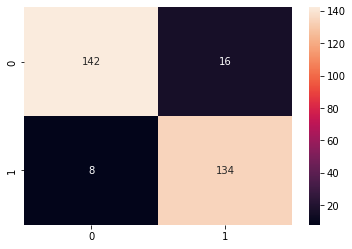

In [68]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,pred)
sns.heatmap(confusion_matrix(y_test,pred),annot=True, fmt='d')

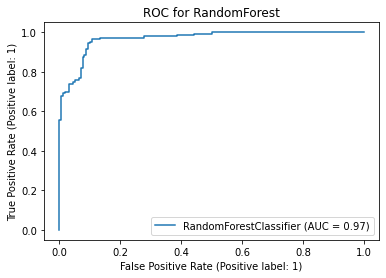

In [69]:
plot_roc_curve(fraud_reported, x_test, y_test)
plt.title("ROC for RandomForest")
plt.show()

## Saving Model

In [70]:
import joblib
joblib.dump(fraud_reported,"fraud_reported.pkl")

['fraud_reported.pkl']